In [44]:
import csv

airports = {}

with open('Input/AerialData/BrazilAirports.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar="'")
    for row in spamreader:
        airports[row[0]] = [double(row[4]), double(row[3])]

print('Airports processed.')

Airports processed.


In [45]:
from xlrd import open_workbook

book = open_workbook('Input//AerialData/vra1449961986931.xls',on_demand=True)
sheet = book.sheet_by_name('VRA')

flightRouteCount = {}

for rownum in range(1,7199):
    routeType = sheet.col(3)[rownum].value
    origin = sheet.col(4)[rownum].value
    destination = sheet.col(5)[rownum].value
              
    if(routeType == 'N' or routeType == 'R') and (airports.__contains__(origin) and airports.__contains__(destination)):
        routeList = [origin, destination]
        routeList.sort()
        route = routeList[0] + routeList[1]

        if(flightRouteCount.__contains__(route)):
            flightRouteCount[route] = flightRouteCount[route]+1
        else:
            flightRouteCount[route] = 1
    
    if(rownum % 500 == 0):
        print(rownum)

for key in flightRouteCount:
    print("%s - %d" % (key, flightRouteCount[key]))

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
SBGLSBSL - 10
SBCTSBPA - 38
SBGLSBRP - 12
SBGLSBKP - 39
SBCTSBSV - 2
SBARSBKP - 4
SBEGSBPV - 26
SBCTSBFI - 28
SBCYSBPV - 17
SBGOSBRP - 8
SBFZSBSG - 19
SBKPSBSV - 17
SBCTSBLO - 22
SBEGSBKP - 8
SBJPSBMO - 2
SBFLSBRJ - 4
SBSPSBUL - 23
SBRJSBSP - 29
SBMOSBSV - 16
SBBESBSL - 23
SBRJSBUL - 2
SBBESBFZ - 22
SBKPSBNF - 20
SBFZSBTE - 14
SBCFSBGL - 29
SBFZSBSL - 26
SBRFSBSG - 16
SBCFSBFZ - 3
SBRPSBSP - 20
SBCFSBSP - 105
SBGLSBJP - 20
SBKPSBPA - 36
SBNFSBRJ - 4
SBFLSBPA - 26
SBSGSBSV - 10
SBEGSBGL - 12
SBCFSBCY - 4
SBCTSBKP - 44
SBFZSBRF - 44
SBCFSBRJ - 68
SBCFSBEG - 4
SBBESBCF - 8
SBPASBRJ - 12
SBCYSBKP - 20
SBGLSBNF - 6
SBCYSBSP - 10
SBKPSBRP - 22
SBGLSBSG - 20
SBSLSBTE - 13
SBCFSBTE - 2
SBCYSBFI - 2
SBCFSBUL - 20
SBRPSBUL - 6
SBCFSBPS - 20
SBCTSBSP - 69
SBCTSBFL - 2
SBLOSBSP - 12
SBGOSBUL - 4
SBLOSBPA - 2
SBCGSBKP - 16
SBRFSBTE - 6
SBKPSBRJ - 84
SBCFSBGO - 16
SBCFSBPA - 12
SBGLSBGO - 3
SBGOSBKP - 20
SBARSBMO - 4
SBFZSBJP - 6
S

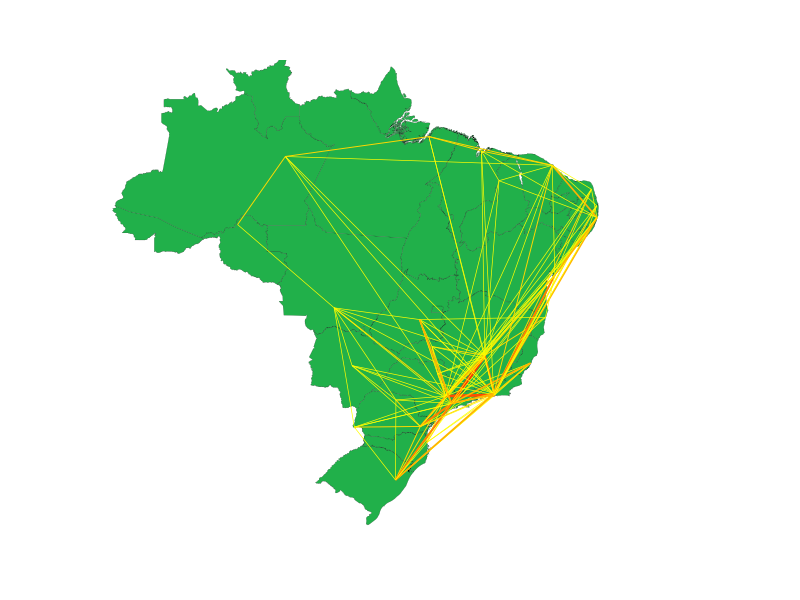

In [55]:
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from numpy import *
from matplotlib.cm import *
from IPython.display import Image as ImageShow

#   -- input --
sf = shapefile.Reader(r'Input/BrazilStatesShapefiles/Brasil.shp')
recs    = sf.records()
shapes  = sf.shapes()
Nshp    = len(shapes)

#   -- plot --
fig     = plt.figure()
ax      = fig.add_subplot(111)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.set_frame_on(False)

for nshp in range(Nshp):
    ptchs   = []
    pts     = array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
    for pij in range(len(prt)):
        ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    ax.add_collection(PatchCollection(ptchs,facecolor=(0.13,0.69,0.29,1),edgecolor='k', linewidths=.1))
    
def drawLine(origin, destination, style):   
    line = [origin, destination]
    ax.add_collection(PatchCollection([Polygon(line)],edgecolor=style[1], linewidths=style[0]))

def getStyle(flightCount):
    if(flightCount < 20):
        return (0.5, (1,1,0,1))
    if(flightCount < 40):
        return (0.7, (1,0.85,0,1))
    if(flightCount < 60):
        return (1.2, (1,0.7,0,1))
    if(flightCount < 80):
        return (1.5, (1,0.5,0,1))
    if(flightCount < 100):
        return (2.0, (1,0.3,0,1))
    if(flightCount < 120):
        return (2.5, (1,0.2,0,1))
    else:
        return (4.0, (1,0,0,1))
    
for route in flightRouteCount:  
    drawLine(airports[route[4:]], airports[route[:4]], getStyle(flightRouteCount[route]))


    
ax.set_xlim(-75,-25)
ax.set_ylim(-35,5)
fig.savefig('test.png')
plt.close('all')
i = ImageShow(filename=r'test.png')
i